# Exploration of Topic Label And Term Distributions Across Dataset

## Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload

## Import Utility Classes

In [2]:
%autoreload 2
import sys
sys.path.append('..')

from utils.data_loader import DataLoader
from utils.term_counter_helper import TermFrequency
from utils.data_frame_helper import DataFrameHelper

## Load Data

In [3]:
loader = DataLoader()
content = loader.load_data("../Data/trainingdata.txt")

Number of Sentences:  5485



In [4]:
# List topic labels for sentences.
label_names = np.array(["A", "B", "C", "D", "E", "F", "G", "H"])
df = loader.get_data_frame(content, label_names)
df_helper = DataFrameHelper(df, label_names)

## Input Dataset in DataFrame Format

In [5]:
df_helper.df.head()

,Labels,Text
0,A,champion products ch approves stock split cham...
1,B,computer terminal systems cpml completes sale ...
2,A,cobanco inc cbco year net shr cts vs dlrs net ...
3,A,am international inc am nd qtr jan oper shr lo...
4,A,brown forman inc bfd th qtr net shr one dlr vs...


## Group Sentences Into Per-Label Corpus

In [6]:
df_helper.groupby_label_df

,Label_freq,Text_concat
Labels,,
A,2840,champion products ch approves stock split cham...
B,1596,computer terminal systems cpml completes sale ...
C,251,brazil anti inflation plan limps to anniversar...
D,108,agency reports ships waiting at panama canal t...
E,41,u s grain carloadings fall in week u s grain c...
F,253,diamond shamrock dia cuts crude prices diamond...
G,190,japan expected to cut base rate for state bodi...
H,206,gulf bond stock markets lag behind gib says gu...


## Explore Topic Label Distribution

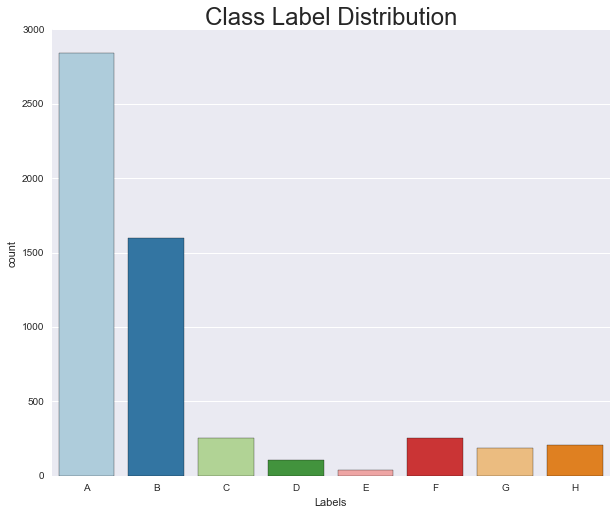

In [7]:
df_helper.plot_label_distribution()

## Transform and Vectorize Dataset into Document-Term Frequency Matrix

In [8]:
min_df = 2

tf = TermFrequency(
    label_names,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words='english',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df = min_df,
    max_features=None,
    vocabulary=None)

tf.vectorize_corpus(df_helper.corpus_matrix)

In [9]:
tf.vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

## Global Corpus Vectorization Summary

In [11]:
df_helper.global_corpus_summary(tf.X, tf.min_count)

Data contains 8 topic labels with 7750 unique words (minimum frequency of 2)


## Plot Number of Unique Terms Per Labels

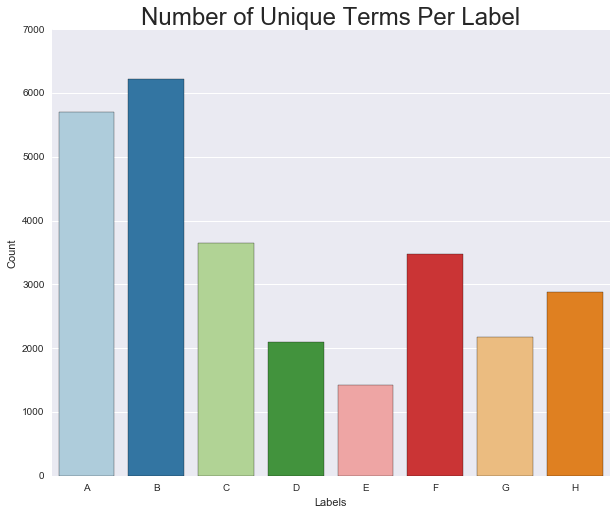

In [12]:
df_helper.plot_terms_per_label(tf.X, unique=True)

## Plot Total Number of Terms Per Label

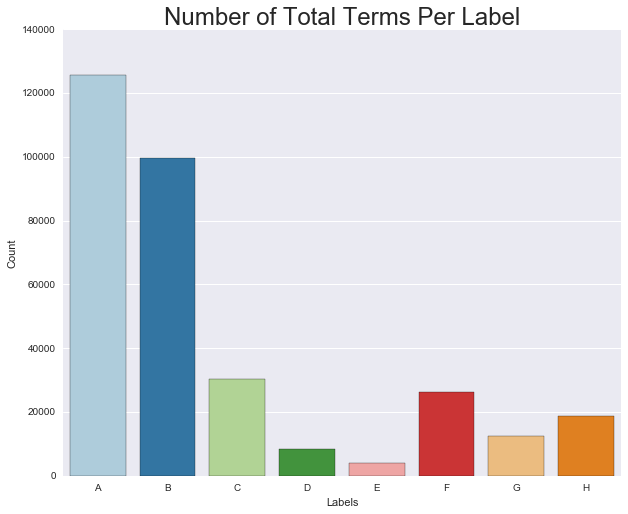

In [13]:
df_helper.plot_terms_per_label(tf.X, unique=False)